In [1]:
import numpy as np
import scipy as sp
from scipy.special import beta, polygamma
from scipy.integrate import quad

import statistics as stat

#matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'cm'
import pandas as pd


import sys
sys.path
sys.path.append("/usr/local/lib/python3.8/site-packages")

import lhapdf

p = lhapdf.mkPDF("CT10nlo", 0)

LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000


In [2]:
#Load fitted params from the replicas:

#Weighting chi2

reps = np.loadtxt('hcj_final_reweighting_reps.dat')

reps_chi2 = reps [:, 0]
reps_k2_p = reps [:, 1]
reps_n    = reps [:, 2]
reps_a    = reps [:, 3]
reps_b    = reps [:, 4]
reps_N    = reps [:, 5]
reps_A    = reps [:, 6]
reps_B    = reps [:, 7]

In [3]:
#Generate file

g1Tdata_up   = open("g1T_up.dat", "w")
g1Tdata_down = open("g1T_down.dat", "w")

In [4]:
#For up quarks:

import lmfit as lm
from lmfit import Parameters, minimize, fit_report
import numdifftools

def momentTMD_up(xmin, xmax, Q2, r):
    
    number_replicas = r
    
    #print(r)
    
    Qinit = 4.0

    def mean_plot(x):
        
        g1Tvals_mean = []
        
        for i in range(number_replicas):
            
            params = lm.Parameters()
            params.add('M', 0.939, vary=False)
            params.add('n', reps_n[i], vary=False)
            params.add('a', reps_a[i], vary=False)
            params.add('b', reps_b[i], vary=False)
        
            M    = params['M'].value
            n    = params['n'].value
            a    = params['a'].value
            b    = params['b'].value

            def bU(y, a, b):
                
                #print(p.xfxQ2(2,y,Qinit))
                
                return (y**(a)) * ((1 - y)**b) * p.xfxQ2(2, y, Qinit)
    
            bUVal, uncertaintyU = quad(bU, 0.0, 1.0, args = (a, b))
                
            g1T = (n / bUVal) * x**a * (1-x)**b * p.xfxQ2(2, x, Q2)
            
            g1Tvals_mean.append(g1T)
    
        return stat.mean(g1Tvals_mean)
     
        
    def error_up(x):
        
        g1Tvals = []
        
        for i in range(number_replicas):
            
            params = lm.Parameters()
            params.add('M', 0.939, vary=False)
            params.add('n', reps_n[i], vary=False)
            params.add('a', reps_a[i], vary=False)
            params.add('b', reps_b[i], vary=False)
        
            M    = params['M'].value
            n    = params['n'].value
            a    = params['a'].value
            b    = params['b'].value

            def bU(y, a, b):
                
                return (y**(a)) * ((1 - y)**b) * p.xfxQ2(2, y, Qinit)
    
            bUVal, uncertaintyU = quad(bU, 0.0, 1.0, args = (a, b))
                
            g1T = (n / bUVal) * x**a * (1-x)**b * p.xfxQ2(2, x, Q2)
            
            g1Tvals.append(g1T)
    
        return stat.stdev(g1Tvals)
    
    
    x_plot          = np.linspace(xmin, xmax,200)
    central_curve   = []
    errorbandu      = []
    
    for j in range(len(x_plot)):
        
        cc = mean_plot(x_plot[j])
        central_curve.append(cc)
        #print(x_plot[j])
        erru  = error_up(x_plot[j])
        errorbandu.append(erru)
    print(x_plot)
    plt.plot(x_plot, central_curve, 'blue')
    plt.fill_between(x_plot, np.asarray(central_curve) - np.asarray(errorbandu), \
                             np.asarray(central_curve) + np.asarray(errorbandu), color = 'powderblue', \
                    label = "Main fit")
    
    with open('g1T_up.dat', 'a') as file:
        my_data_up = np.column_stack((x_plot, central_curve,errorbandu))
        
        np.savetxt(file, my_data_up)
        
    with open('g1T_up_overx.dat', 'a') as file:
        my_data_up = np.column_stack((x_plot, np.array(central_curve)/np.array(x_plot),errorbandu))
        
        np.savetxt(file, my_data_up)
        
            
    return   
    

In [5]:
#For down quarks:

import lmfit as lm
from lmfit import Parameters, minimize, fit_report
import numdifftools

def momentTMD_down(xmin, xmax, Q2, r):
    
    number_replicas = r
    
    Qinit = 4.0
    
    def mean_plot(x):
        
        g1Tvals_mean = []
        
        for i in range(number_replicas):
            
            params = lm.Parameters()
            params.add('M', 0.939, vary=False)
            params.add('N', reps_N[i], vary=False)
            params.add('A', reps_A[i], vary=False)
            params.add('B', reps_B[i], vary=False)
            
            M    = params['M'].value
            N    = params['N'].value
            A    = params['A'].value
            B    = params['B'].value
        
            def bD(y, A, B):
                
                return (y**(A)) * ((1 - y)**B) * p.xfxQ2(1, y, Qinit)
       
            bDVal, uncertaintyD = quad(bD, 0.0, 1.0, args = (A, B))
                
            g1T = (N / bDVal) * x**A * (1-x)**B * p.xfxQ2(1, x, Q2)
            
            g1Tvals_mean.append(g1T)
    
        return stat.mean(g1Tvals_mean)
    
    
    def error_down(x):
        
        g1Tvals = []
        
        for i in range(number_replicas):
            
            params = lm.Parameters()
            params.add('M', 0.939, vary=False)
            params.add('N', reps_N[i], vary=False)
            params.add('A', reps_A[i], vary=False)
            params.add('B', reps_B[i], vary=False)
            
            M    = params['M'].value
            N    = params['N'].value
            A    = params['A'].value
            B    = params['B'].value
        
            def bD(y, A, B):
                
                return (y**(A)) * ((1 - y)**B) * p.xfxQ2(1, y, Qinit)
       
            bDVal, uncertaintyD = quad(bD, 0.0, 1.0, args = (A, B))
                
            g1T = (N / bDVal) * x**A * (1-x)**B * p.xfxQ2(1, x, Q2)
            
            g1Tvals.append(g1T)
    
        return stat.stdev(g1Tvals)
    
    
    x_plot        = np.linspace(xmin, xmax,200)
    central_curve = []
    errorbandd    = []
    
    for j in range(len(x_plot)):
        
        cc = mean_plot(x_plot[j])
        central_curve.append(cc)
        
        errd  = error_down(x_plot[j])
        errorbandd.append(errd)

    plt.plot(x_plot, central_curve, 'blue')
    plt.fill_between(x_plot, np.asarray(central_curve) - np.asarray(errorbandd), \
                             np.asarray(central_curve) + np.asarray(errorbandd), color = 'powderblue')
    
    with open('g1T_down.dat', 'a') as file:
        my_data_down = np.column_stack((x_plot, central_curve,errorbandd))
        
        np.savetxt(file, my_data_down)
     
    with open('g1T_down_overx.dat', 'a') as file:
        my_data_up = np.column_stack((x_plot, np.array(central_curve)/np.array(x_plot),errorbandd))
        
        np.savetxt(file, my_data_up)
        
    return   
    

[1.00000000e-04 5.12412060e-03 1.01482412e-02 1.51723618e-02
 2.01964824e-02 2.52206030e-02 3.02447236e-02 3.52688442e-02
 4.02929648e-02 4.53170854e-02 5.03412060e-02 5.53653266e-02
 6.03894472e-02 6.54135678e-02 7.04376884e-02 7.54618090e-02
 8.04859296e-02 8.55100503e-02 9.05341709e-02 9.55582915e-02
 1.00582412e-01 1.05606533e-01 1.10630653e-01 1.15654774e-01
 1.20678894e-01 1.25703015e-01 1.30727136e-01 1.35751256e-01
 1.40775377e-01 1.45799497e-01 1.50823618e-01 1.55847739e-01
 1.60871859e-01 1.65895980e-01 1.70920101e-01 1.75944221e-01
 1.80968342e-01 1.85992462e-01 1.91016583e-01 1.96040704e-01
 2.01064824e-01 2.06088945e-01 2.11113065e-01 2.16137186e-01
 2.21161307e-01 2.26185427e-01 2.31209548e-01 2.36233668e-01
 2.41257789e-01 2.46281910e-01 2.51306030e-01 2.56330151e-01
 2.61354271e-01 2.66378392e-01 2.71402513e-01 2.76426633e-01
 2.81450754e-01 2.86474874e-01 2.91498995e-01 2.96523116e-01
 3.01547236e-01 3.06571357e-01 3.11595477e-01 3.16619598e-01
 3.21643719e-01 3.266678

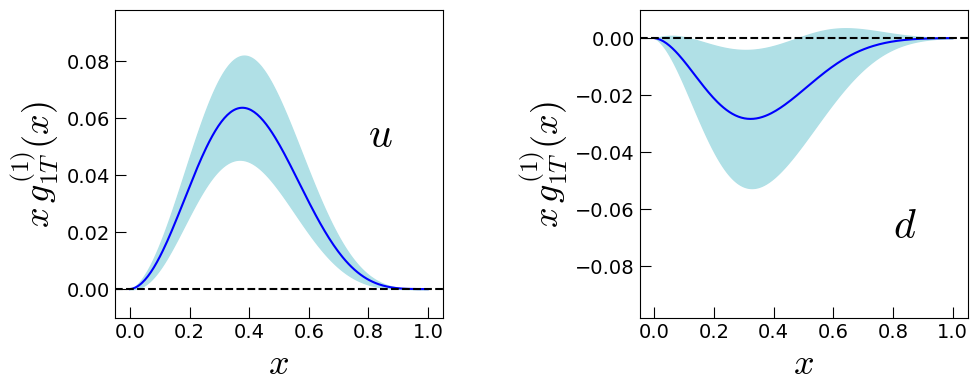

In [6]:
fig = plt.figure(figsize = (11, 4))   #Create a figure

gs = fig.add_gridspec(1, 2)  #Call it in the argument of the subplot function

fig1 = fig.add_subplot(gs[0, 0])
momentTMD_up(0.0001, 0.9999, 4, 201)
plt.ylabel(r"$x \, g^{(1)}_{1T}(x)$",fontsize=26)
plt.xlabel(r"$x$",fontsize=26)
plt.text(0.8, 0.05, r"$u$", dict(size=30))
plt.axhline(y = 0, color ='k', linestyle = '--')
plt.ylim(-0.01, 0.098)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', size=8,direction='in')
plt.tick_params(axis='y', size=8,direction='in')

fig2 = fig.add_subplot(gs[0, 1])
momentTMD_down(0.0001, 0.9999, 4, 201)
plt.ylabel(r"$x \, g^{(1)}_{1T}(x)$",fontsize=26)
plt.xlabel(r"$x$",fontsize=26)
plt.text(0.8, -0.07, r"$d$", dict(size=30))
plt.axhline(y = 0, color ='k', linestyle = '--')
plt.ylim(-0.098, 0.01)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', size=8,direction='in')
plt.tick_params(axis='y', size=8,direction='in')


plt.subplots_adjust(wspace = 0.6)

#plt.savefig('main_fit_weightedchi2.pdf', bbox_inches='tight')

[1.00000000e-04 5.12412060e-03 1.01482412e-02 1.51723618e-02
 2.01964824e-02 2.52206030e-02 3.02447236e-02 3.52688442e-02
 4.02929648e-02 4.53170854e-02 5.03412060e-02 5.53653266e-02
 6.03894472e-02 6.54135678e-02 7.04376884e-02 7.54618090e-02
 8.04859296e-02 8.55100503e-02 9.05341709e-02 9.55582915e-02
 1.00582412e-01 1.05606533e-01 1.10630653e-01 1.15654774e-01
 1.20678894e-01 1.25703015e-01 1.30727136e-01 1.35751256e-01
 1.40775377e-01 1.45799497e-01 1.50823618e-01 1.55847739e-01
 1.60871859e-01 1.65895980e-01 1.70920101e-01 1.75944221e-01
 1.80968342e-01 1.85992462e-01 1.91016583e-01 1.96040704e-01
 2.01064824e-01 2.06088945e-01 2.11113065e-01 2.16137186e-01
 2.21161307e-01 2.26185427e-01 2.31209548e-01 2.36233668e-01
 2.41257789e-01 2.46281910e-01 2.51306030e-01 2.56330151e-01
 2.61354271e-01 2.66378392e-01 2.71402513e-01 2.76426633e-01
 2.81450754e-01 2.86474874e-01 2.91498995e-01 2.96523116e-01
 3.01547236e-01 3.06571357e-01 3.11595477e-01 3.16619598e-01
 3.21643719e-01 3.266678

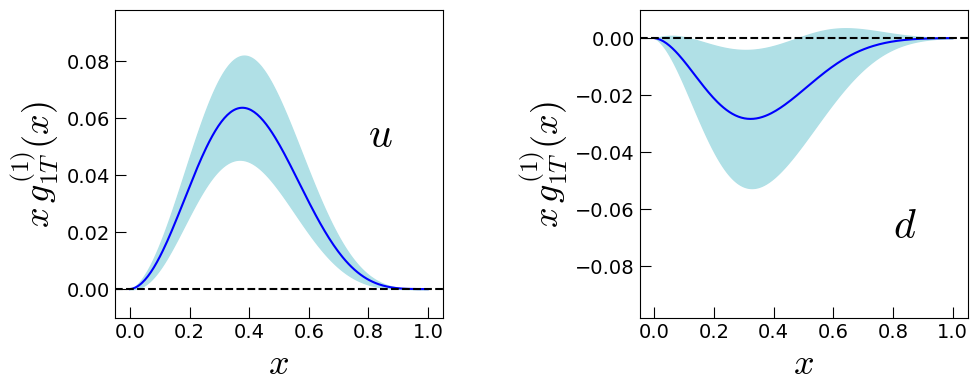

In [7]:
fig = plt.figure(figsize = (11, 4))   #Create a figure

gs = fig.add_gridspec(1, 2)  #Call it in the argument of the subplot function

fig1 = fig.add_subplot(gs[0, 0])
momentTMD_up(0.0001, 0.9999, 4, 201)
plt.ylabel(r"$x \, g^{(1)}_{1T}(x)$",fontsize=26)
plt.xlabel(r"$x$",fontsize=26)
plt.text(0.8, 0.05, r"$u$", dict(size=30))
plt.axhline(y = 0, color ='k', linestyle = '--')
plt.ylim(-0.01, 0.098)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', size=8,direction='in')
plt.tick_params(axis='y', size=8,direction='in')

fig2 = fig.add_subplot(gs[0, 1])
momentTMD_down(0.0001, 0.9999, 4, 201)
plt.ylabel(r"$x \, g^{(1)}_{1T}(x)$",fontsize=26)
plt.xlabel(r"$x$",fontsize=26)
plt.text(0.8, -0.07, r"$d$", dict(size=30))
plt.axhline(y = 0, color ='k', linestyle = '--')
plt.ylim(-0.098, 0.01)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', size=8,direction='in')
plt.tick_params(axis='y', size=8,direction='in')


plt.subplots_adjust(wspace = 0.6)

#plt.savefig('main_fit_weightedchi2.pdf', bbox_inches='tight')

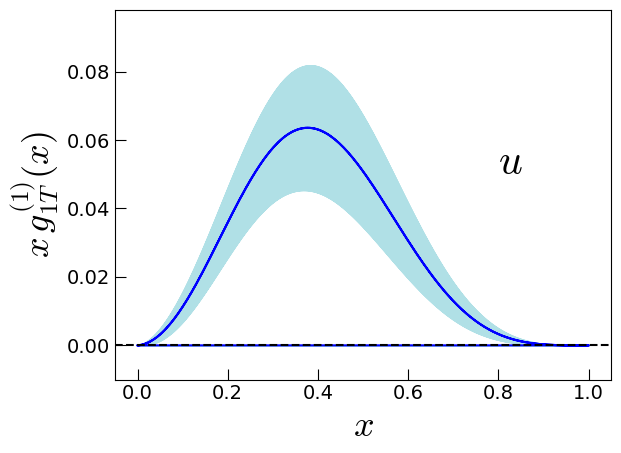

In [8]:
data = np.loadtxt('g1T_up.dat')

xdata = data[:,0]
ydata = data[:,1]
zdata = data[:,2]

#plt.plot(xdata,ydata)

plt.plot(xdata, ydata, 'blue')
plt.fill_between(xdata, np.asarray(ydata) - np.asarray(zdata), \
                             np.asarray(ydata) + np.asarray(zdata), color = 'powderblue')
plt.ylabel(r"$x \, g^{(1)}_{1T}(x)$",fontsize=26)
plt.xlabel(r"$x$",fontsize=26)
plt.text(0.8, 0.05, r"$u$", dict(size=30))
plt.axhline(y = 0, color ='k', linestyle = '--')
plt.ylim(-0.01, 0.098)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', size=8,direction='in')
plt.tick_params(axis='y', size=8,direction='in')
        

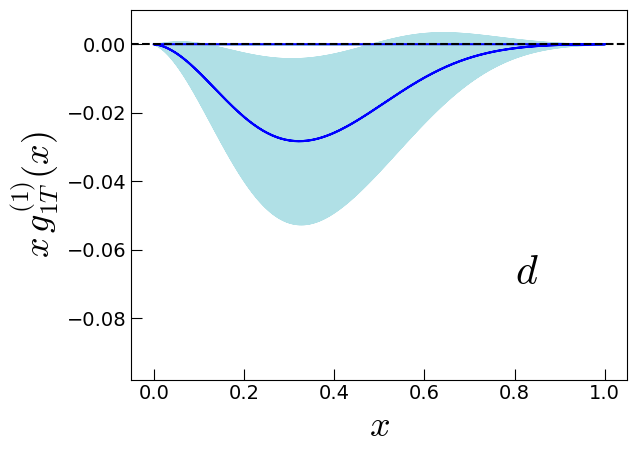

In [9]:
data = np.loadtxt('g1T_down.dat')

xdata = data[:,0]
ydata = data[:,1]
zdata = data[:,2]

#plt.plot(xdata,ydata)

plt.plot(xdata, ydata, 'blue')
plt.fill_between(xdata, np.asarray(ydata) - np.asarray(zdata), \
                             np.asarray(ydata) + np.asarray(zdata), color = 'powderblue')
plt.ylabel(r"$x \, g^{(1)}_{1T}(x)$",fontsize=26)
plt.xlabel(r"$x$",fontsize=26)
plt.text(0.8, -0.07, r"$d$", dict(size=30))
plt.axhline(y = 0, color ='k', linestyle = '--')
plt.ylim(-0.098, 0.01)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', size=8,direction='in')
plt.tick_params(axis='y', size=8,direction='in')
        